# Importing and Reading the Las File.

In [1]:
import lasio

las = lasio.read('Sample_Well_3.las')

print(las)

print(las.keys())

['DEPTH', 'GR', 'NPHI', 'DPHI', 'DT', 'ILD']


In [2]:
print(las.curves)

Mnemonic  Unit     Value  Description                 
--------  ----     -----  -----------                 
DEPTH     FT              Depth                       
GR        API             Gamma Ray                   
NPHI      PU              Neutron porosity            
DPHI      PU              Density porosity            
DT        USEC/FT         Acoustic transit time       
ILD       OHM-M           Deep Induction Resistivity  


In [3]:
las.data.shape

(7763, 6)

In [4]:
las.df().describe()

,GR,NPHI,DPHI,DT,ILD
count,7675.000000,7424.000000,7585.000000,7729.000000,7668.000000
mean,75.706986,0.248779,0.138878,84.474391,777.237383
std,42.525014,0.112107,0.117885,22.491088,213.546367
min,10.132000,0.019000,-0.076000,43.275000,385.078000
25%,36.377000,0.145000,0.061000,62.141000,625.652000
50%,79.292000,0.282000,0.117000,87.936000,733.050500
75%,102.496000,0.344000,0.180000,101.390000,879.553000
max,300.101000,0.495000,0.701000,156.106000,1998.957000


# EDA - Exploratory Data Analysis

In [5]:
print(las.keys())  # Lists all the curves (logs) available
print(las.well)   

['DEPTH', 'GR', 'NPHI', 'DPHI', 'DT', 'ILD']
Mnemonic  Unit  Value                      Description        
--------  ----  -----                      -----------        
STRT      FT    245.0                      START DEPTH        
STOP      FT    4126.0                     STOP DEPTH         
STEP      FT    0.5                        STEP DEPTH         
NULL            -9999                      NULL VALUE         
COMP            HEARTLAND OIL & GAS, INC.  OPERATING COMPANY  
LEAS            GEORG                      LEASE NAME         
WELL            15-12                      WELL NUMBER        
FLD             FOREST CITY COAL GAS AREA  FIELD              
LOC             12-03S-14E                 LOCATION           
LOC1            S2 SW SE                   QUARTERS           
LOC2            580 FSL 1980 FEL           FOOTAGES           
SEC             12                         SECTION            
TWP             03S                        TOWNSHIP           
RANG      

# Correlation Matrix - Pearson and Spearman

In [6]:
df = las.df()

# Compute the Pearson correlation matrix
pearson_corr = df.corr(method='pearson')

# Compute the Spearman correlation matrix
spearman_corr = df.corr(method='spearman')

# Print both correlation matrices
print("Pearson Correlation Matrix:")
print(pearson_corr)

print("\nSpearman Correlation Matrix:")
print(spearman_corr)

Pearson Correlation Matrix:
            GR      NPHI      DPHI        DT       ILD
GR    1.000000  0.649320  0.374866  0.714262 -0.558340
NPHI  0.649320  1.000000  0.714872  0.897961 -0.810632
DPHI  0.374866  0.714872  1.000000  0.667454 -0.549783
DT    0.714262  0.897961  0.667454  1.000000 -0.797760
ILD  -0.558340 -0.810632 -0.549783 -0.797760  1.000000

Spearman Correlation Matrix:
            GR      NPHI      DPHI        DT       ILD
GR    1.000000  0.663402  0.465984  0.758002 -0.557778
NPHI  0.663402  1.000000  0.830584  0.904291 -0.788205
DPHI  0.465984  0.830584  1.000000  0.773022 -0.735623
DT    0.758002  0.904291  0.773022  1.000000 -0.808168
ILD  -0.557778 -0.788205 -0.735623 -0.808168  1.000000


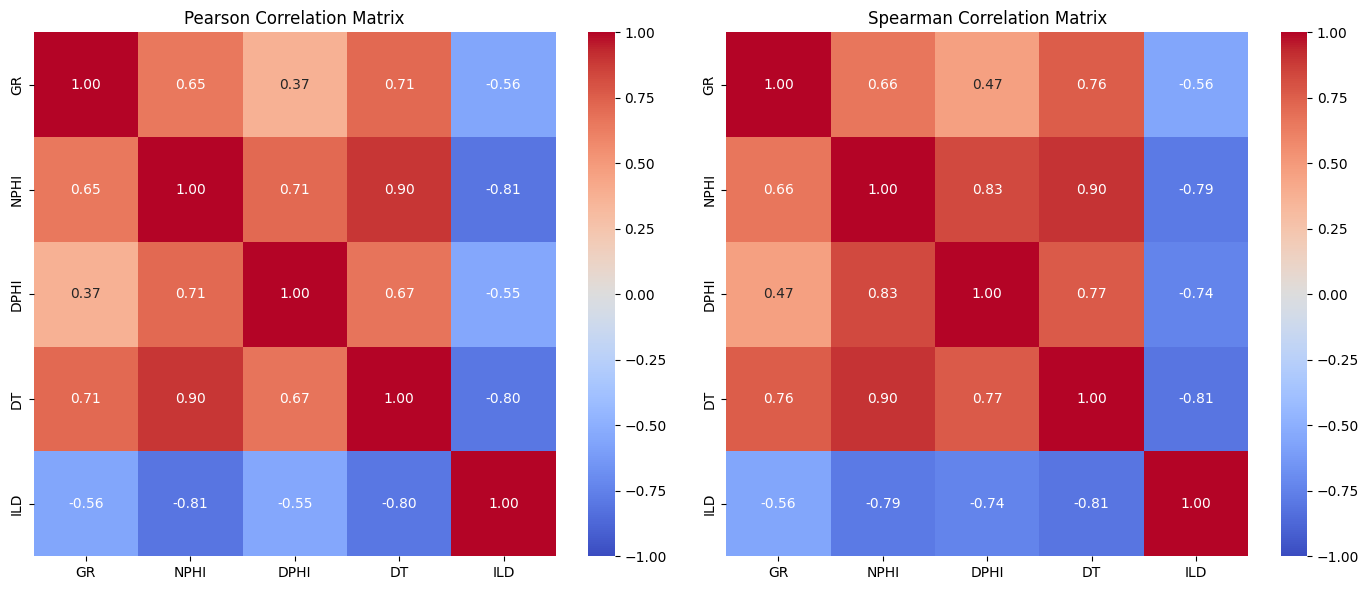

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Pearson Correlation Matrix
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix')

# Plot Spearman Correlation Matrix
plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix')

plt.tight_layout()
plt.show()

# Plotting The Logging Data along with their Interpretation

In [8]:
limits = {
    'DEPTH' : (2500, 5000),
    'GR': (10, 175),
    'NPHI': (-0.15, 0.4),       
    'DPHI': (-0.1, 0.3),
    'DT': (0, 200),
    'ILD' : (300, 2000)
}

colors = {
    'GR': 'black',
    'NPHI': 'blue',       
    'DPHI': 'red',
    'DT': 'green',
    'ILD' : 'brown'     
}

curves = ['GR', 'NPHI', 'DPHI', 'DT', 'ILD']

Abbreviation = {
    'GR': 'Gamma Log',      
    'NPHI': 'Neutron Porosity Log',
    'DPHI': 'Density Porosity Log',
    'DT' : 'Acaustic Log',
    'ILD' : 'Deep Induction Resistivity Log'
}

In [9]:
import numpy as np

def plot_log_curves_with_limits(curve, curves, limits,points, depth_unit='ft'):
    
    plt.figure(figsize=(10, 10))
    
    # Loop through each specified curve
    if curve in curves:
        if curve in las.keys():
            # Extract data
            depth = las.index
            data = np.array(las[curve].data)

            #Depth limits
            if 'DEPTH' in limits:
                depth_min, depth_max = limits['DEPTH']
                mask = (depth >= depth_min) & (depth <= depth_max)
                depth = depth[mask]
                data = data[mask]
            
            # Define limits
            if curve in limits:
                lower_limit, upper_limit = limits[curve]
                data = data.clip(lower_limit, upper_limit)
            
            # Plot the data
            plt.plot(data, depth, label=curve, color=colors.get(curve, 'black'))
    
    # Customize plot
    plt.gca().invert_yaxis()  # Invert Y axis to match standard log plotting
    plt.xlabel('Value')
    plt.ylabel(f'Depth ({depth_unit})')
    plt.title(f'Log Curves: {Abbreviation[curve]}')

    for i, region in enumerate(points):
        plt.axhspan(region[0], region[1], color='green', alpha=0.3, label='Region of Interest' if i==0 else None)
    #plt.axhspan(point[0], point[1], color='green', alpha=0.3, label='Region of Intrest')

    plt.legend()
    plt.grid(True)
    plt.show()

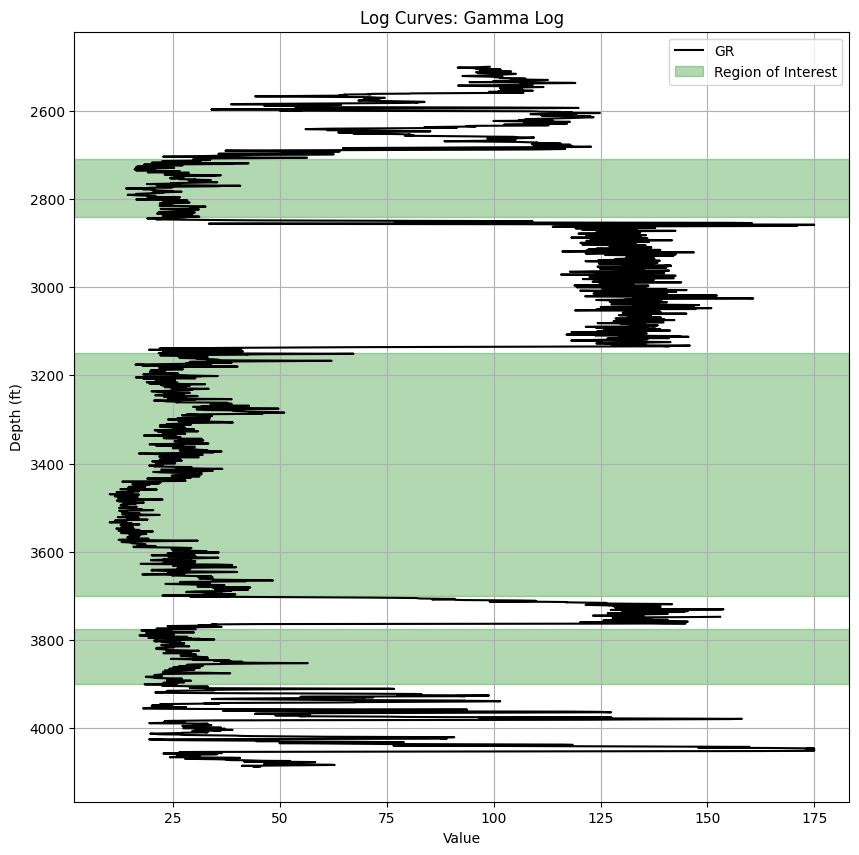

In [10]:
regions = [[2710,2840], [3150,3700],[3775,3900]]
plot_log_curves_with_limits('GR', curves, limits, points = regions, depth_unit='ft')

Above is the log data curve for gamma ray log, which mainly represents the presence of shale in the formation. If the readings of gamma ray log are too large, it indicates shale. Thus, for depths 2710–2840 ft, 3150–3700 ft, and 3775–3900 ft, we observe low gamma ray values, suggesting the presence of potential reservoir rocks like sandstone or limestone.

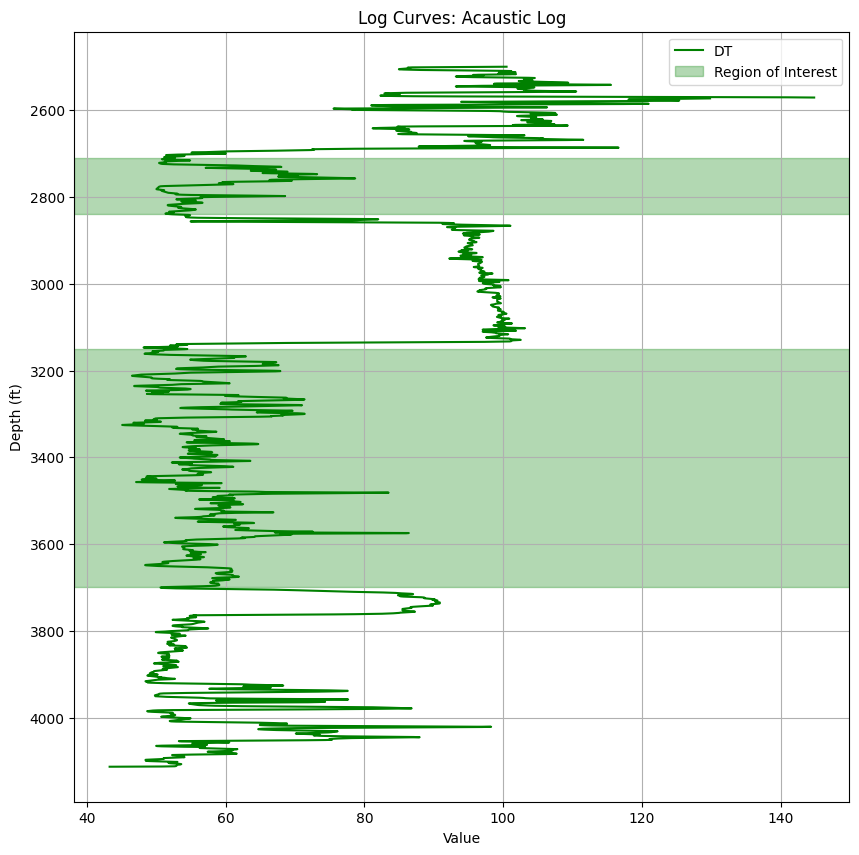

In [11]:
regions = [[2710,2840], [3150,3700]]
plot_log_curves_with_limits('DT', curves, limits, points = regions, depth_unit='ft')

The DT log measures the travel time of sound waves through rock. Low DT values (fast travel) suggest compact, non-porous rocks like limestone. High DT values indicate slower travel, usually through porous or less dense rocks that may store hydrocarbons. Between 3150-3700 ft and 2710-2840 ft, moderately high DT suggests potential porosity, supporting possible reservoir zones.

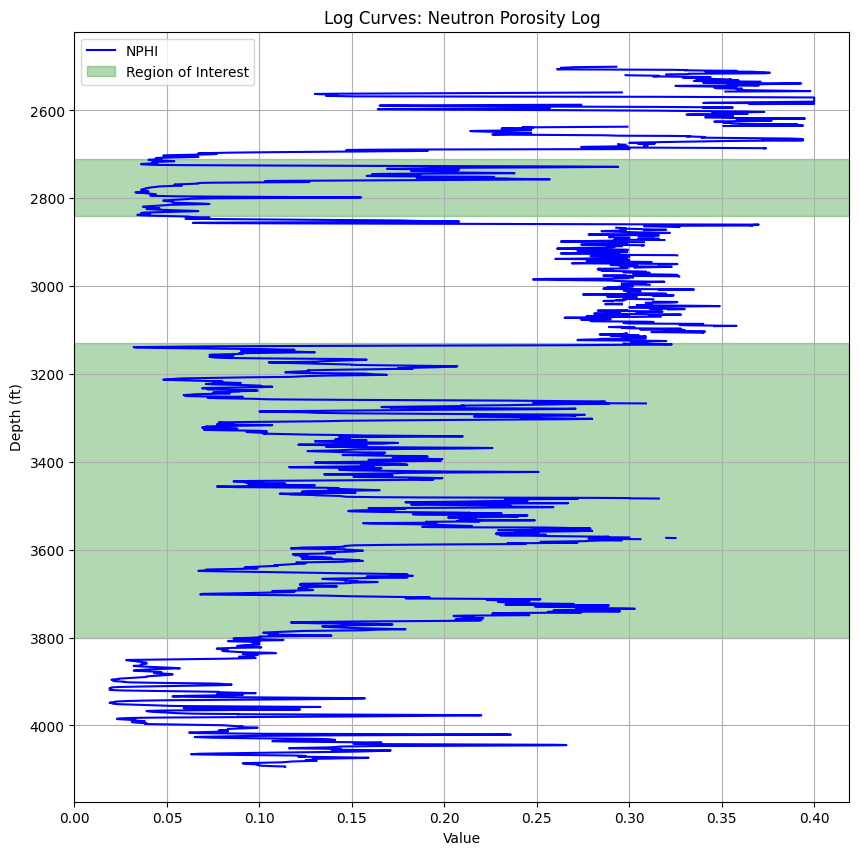

In [12]:
regions = [[2710,2840], [3130,3800]]
plot_log_curves_with_limits('NPHI', curves, limits, points = regions, depth_unit='ft')

This neutron porosity log detects hydrogen concentration, which indirectly relates to porosity. It is particularly sensitive to fluids in the pores. Zones like 2710–2840 ft and 3150–3800 ft show moderate neutron porosity, supporting the possibility of fluid-filled porous formations, likely reservoir rocks.

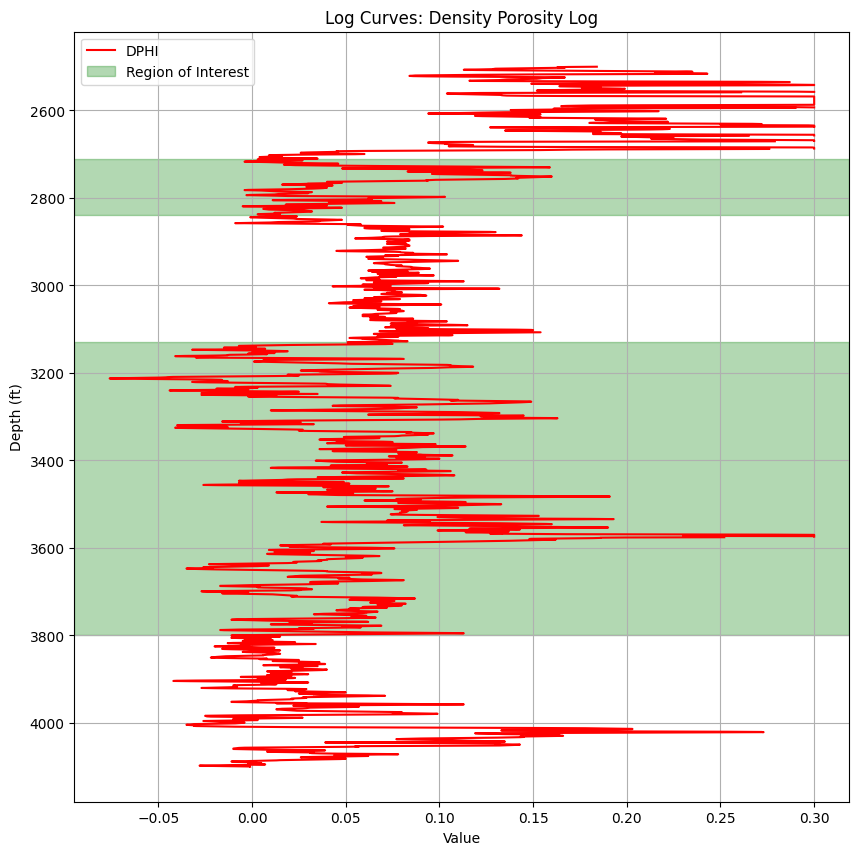

In [13]:
regions = [[2710,2840], [3130,3800]]
plot_log_curves_with_limits('DPHI', curves, limits, points = regions, depth_unit='ft')

The density porosity log estimates porosity from bulk density. Regions with higher DPHI values (e.g., around 3150–3800 ft) suggest the presence of significant pore space. 
These zones, when matched with low gamma ray and resistivity logs, could point to potential hydrocarbon-bearing formations.

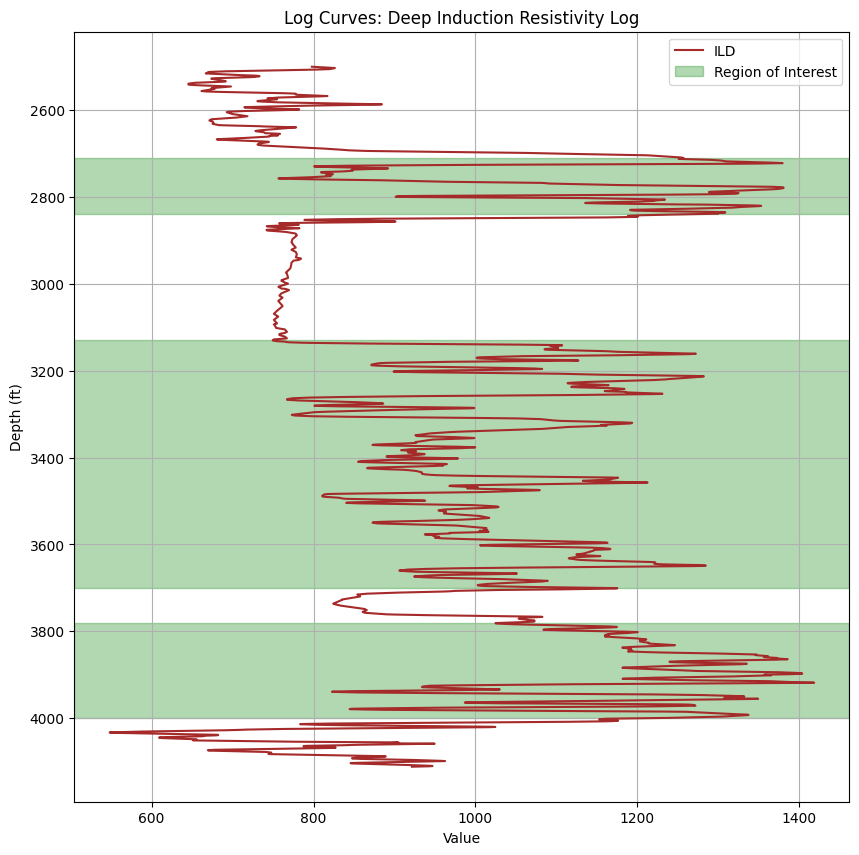

In [14]:
regions = [[2710,2840], [3130,3700],[3780,4000]]
plot_log_curves_with_limits('ILD', curves, limits, points = regions, depth_unit='ft')

This log shows formation resistivity, useful for fluid identification. Higher resistivity values in regions like 2710–2840 ft, 3130–3700 ft and 3780–4000 ft imply hydrocarbon presence, since oil and gas are more resistive than water. When these high-resistivity zones align with high porosity and low GR, they are strong candidates for productive reservoir zones.



With the above study and interpretation of the log data, I conclude that, in my point of view, the interval between 3150 ft and 3700 ft appears to be the most suitable region for oil and gas extraction. This depth range shows low gamma ray values (indicating clean reservoir rock), low acoustic travel time (suggesting compact, fluid-filled formations), increased porosity (from NPHI and DPHI logs), and relatively high resistivity (from the ILD log), all of which are strong indicators of a hydrocarbon-bearing zone.